In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sbn
import numpy as np
import nltk
import re

In [2]:
books = pd.read_csv('BooksDataSet.csv')
books=books[["book_id","book_name","genre","summary"]]
books.head()

,book_id,book_name,genre,summary
0,3248537,Drowned Wednesday,Fantasy,Drowned Wednesday is the first Trustee among ...
1,27796919,The Lost Hero,Fantasy,"As the book opens, Jason awakens on a school ..."
2,3910776,The Eyes of the Overworld,Fantasy,Cugel is easily persuaded by the merchant Fia...
3,5969644,Magic's Promise,Fantasy,The book opens with Herald-Mage Vanyel return...
4,3173445,Taran Wanderer,Fantasy,Taran and Gurgi have returned to Caer Dallben...


In [3]:
books["summary"][0][:100]

" Drowned Wednesday is the first Trustee among the Morrow Days who is on Arthur's side and wishes the"

In [4]:
books.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   book_id    3000 non-null   int64 
 1   book_name  3000 non-null   object
 2   genre      3000 non-null   object
 3   summary    3000 non-null   object
dtypes: int64(1), object(3)
memory usage: 93.9+ KB


<AxesSubplot:xlabel='genre', ylabel='count'>

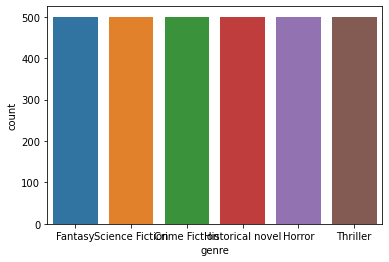

In [5]:
sbn.countplot(x=books["genre"])

In [6]:
eg=books["summary"][0][:200]
eg

" Drowned Wednesday is the first Trustee among the Morrow Days who is on Arthur's side and wishes the Will to be fulfilled. She appears as a leviathan/whale and suffers from Gluttony. The book begins w"

In [7]:
#cleaning the text remove all nuumbers , symbols
def cleanText(str):
    text=re.sub("[^a-zA-Z]"," ",str)
    text=text.lower()
    return text

In [8]:
books["summary"]=books["summary"].apply(cleanText)

In [9]:
def showMostFreq(text,no_words):
    allWords=text.split()
    fdist=nltk.FreqDist(allWords)
    words_df=pd.DataFrame({"count":fdist.values(),"words":fdist.keys()})
    max=words_df.nlargest(columns="count",n=no_words)    
    sbn.barplot(data=max,x='count',y="words")
    

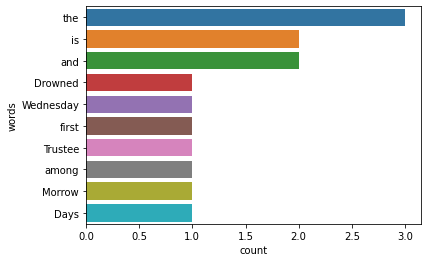

In [10]:
showMostFreq(eg,10)

### Removing the stopwords

In [11]:
nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to /Users/user/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [12]:
def removeStopWords(value):
    otherWords=[word for word in value.split() if word not in stop_words]
    return ' '.join(otherWords)

In [13]:
books["summary"]=books["summary"].apply(removeStopWords)

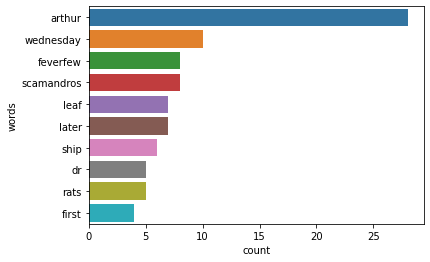

In [14]:
showMostFreq(books["summary"][0],10)

### Lemmatizing

In [15]:
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer
lemma=WordNetLemmatizer()

def lemmatization(sentence):
    stemSentence=""
    for word in sentence.split():
        stem=lemma.lemmatize(word)
        stemSentence+=stem
        stemSentence+=" "
    stemSentence=stemSentence.strip()
    return stemSentence

books["summary"]=books['summary'].apply(lemmatization)

[nltk_data] Downloading package wordnet to /Users/user/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [33]:
lemma.lemmatize("drives")

'drive'

### Stemming

In [34]:
from nltk.stem import PorterStemmer
stemmer=PorterStemmer()

def stemming(sentence):
    stemSentence=""
    for word in sentence.split():
        stem=stemmer.stem(word)
        stemSentence+=stem
        stemSentence+=" "
    stemSentence=stemSentence.strip()
    return stemSentence
books['summary'] = books['summary'].apply(stemming)

In [36]:
stemmer.stem("driving")

'drive'

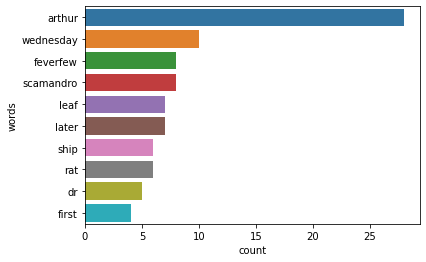

In [38]:
showMostFreq(books['summary'][0],10)

### Encoding

In [39]:
booklist=books["genre"].unique()

In [44]:
encode=[i for i in range(len(booklist))]
encoded=dict(zip(booklist,encode))
encoded

{'Fantasy': 0,
 'Science Fiction': 1,
 'Crime Fiction': 2,
 'Historical novel': 3,
 'Horror': 4,
 'Thriller': 5}

In [45]:
books["genre"]=books["genre"].map(encoded)

In [46]:
books["genre"]

0       0
1       0
2       0
3       0
4       0
       ..
2995    5
2996    5
2997    5
2998    5
2999    5
Name: genre, Length: 3000, dtype: int64

### Model Building

In [47]:
books.head()

,book_id,book_name,genre,summary
0,3248537,Drowned Wednesday,0,drown wednesday first trust among morrow day a...
1,27796919,The Lost Hero,0,book open jason awaken school bu unabl rememb ...
2,3910776,The Eyes of the Overworld,0,cugel easili persuad merchant fianosth attempt...
3,5969644,Magic's Promise,0,book open herald mage vanyel return countri va...
4,3173445,Taran Wanderer,0,taran gurgi return caer dallben follow event t...


In [51]:
from sklearn.feature_extraction.text import CountVectorizer

In [52]:
countVector=CountVectorizer(max_df=0.90,min_df=2,max_features=100,stop_words='english')
word_vocab=countVector.fit_transform(books['summary'])

In [53]:
word_vocab

<3000x100 sparse matrix of type '<class 'numpy.int64'>'
	with 72677 stored elements in Compressed Sparse Row format>

In [54]:
X=word_vocab
y=books["genre"]

In [55]:
from sklearn.model_selection import train_test_split

In [57]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [58]:
X_train

<2010x100 sparse matrix of type '<class 'numpy.int64'>'
	with 48580 stored elements in Compressed Sparse Row format>

In [59]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

In [69]:
cvc=SVC()
cvc.fit(X_train,y_train)
prediction=cvc.predict(X_test)
accuracy_score(y_test,prediction)

0.47474747474747475

### Lets try with TfidfVectorizer


In [70]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [71]:
X_train, X_test, y_train, y_test = train_test_split(books["summary"], y, test_size=0.33, random_state=42)


In [83]:
model=TfidfVectorizer(max_df=0.8,max_features=10000)
xtrain_tfidf=model.fit_transform(X_train)
xtest_tfidf=model.transform(X_test.values)

In [84]:
cvc=SVC()
cvc.fit(xtrain_tfidf,y_train)
prediction=cvc.predict(xtest_tfidf)
accuracy_score(y_test,prediction)

0.7202020202020202